# Лабораторная работа по машинному обучению №2

## Выполнил: студент группы 15-АС Тузов Илья

## Вариант 27

## Цель рабораторной работы - получение навыков работы с методами классификации

#### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

|переменная|описание|значения|
|----------|--------|--------|
|date|Дата год-месяц-день час:минута:секунда|строка|
|Temperature|Температура в градусах Цельсия|вещественное|
|Humidity|Относитальная влажность в %|вещественное|
|Light|Освещенность в лк|вещественное|
|CO2|Содержание углекислого газа в миллионных долях|вещественное|
|HumidityRatio|отношение массы водяного пара к массе сухого воздуха|вещественное|
|Occupancy|занятость|логическое|

In [12]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('D:\datatraining.txt', sep = ",")
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
data.shape

(8143, 7)

In [13]:
data = data.drop_duplicates()
data.shape

(8143, 7)

#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

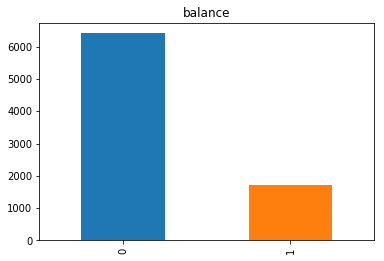

In [14]:
data['Occupancy'].value_counts().plot(kind = "bar", title = "balance")
plt.show()

Количество элементов классов отличается, значит классы несбалансированны. 
Будем использовать ROC-кривую, т.к. она дает адекватную оценку качества работы алгоритма, 
где классы несбалансированны и их размеры выборки отличаются друг от друга несущественно (не на порядок)

#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

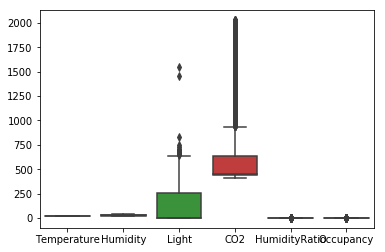

In [15]:
# количественные признаки
quantitative_columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
data = data[quantitative_columns]
sns.boxplot(data = data)

В качестве способа масштабирования выберем метод нормализации

In [16]:
x = data[quantitative_columns].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataCopy = pd.DataFrame(x_scaled, columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])
dataCopy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1.000000,0.470533,0.275490,0.190933,0.557318,1.0
1,0.992823,0.470332,0.277754,0.186446,0.554807,1.0
2,0.992823,0.469326,0.275490,0.186136,0.553761,1.0
3,0.992823,0.467315,0.275490,0.182887,0.551669,1.0
4,0.980861,0.467315,0.275490,0.180566,0.547851,1.0


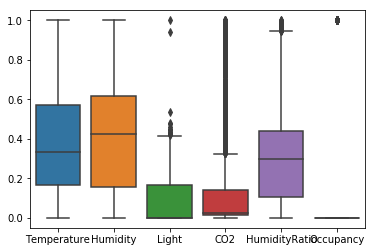

In [7]:
sns.boxplot(data = dataCopy)

#### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

Категориальные признаки отсутствуют

#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

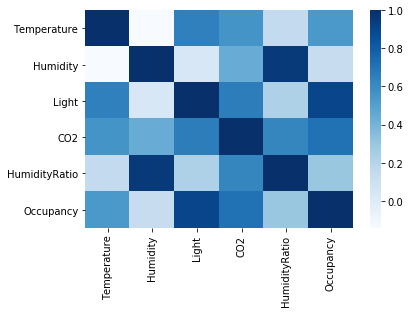

In [8]:
data_corr = data.corr()
sns.heatmap(data_corr, cmap="Blues")
plt.show()

In [38]:
data_corr

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


Видна сильная зависимость между параметрами(Humidity -> HumidityRatio, Light -> Occupancy)

#### 7.	Заполните пропущенные значения в данных;

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 6 columns):
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);  
4 – логический классификатор (бинарное решающее дерево).

In [17]:
# разделим полученные данные на данные для обучения и теста
from sklearn.model_selection import train_test_split
import numpy as np
dataCopyOccupancy = dataCopy['Occupancy']
dataCopy = dataCopy.drop('Occupancy', axis=1)
X, Y = dataCopy, dataCopyOccupancy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 211)
print(X_train.shape)
print(X_test.shape)

(5292, 5)
(2851, 5)


#### 1.классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [97]:
# найдем оптимальный радиус для классификатора ближайших соседей
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.grid_search import GridSearchCV
rnc = RadiusNeighborsClassifier(outlier_label=1.0)

params = {'radius': np.arange(0.0, 5.0, 0.25)}

gridSearch = GridSearchCV(rnc, params)
gridSearch.fit(X_train, Y_train)

chose_radius = gridSearch.best_estimator_.radius
chose_score = gridSearch.best_score_
print('best train score:', chose_score, ' at radius:', chose_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1.0, radius=chose_radius)
rnc.fit(X_train, Y_train)
score  = np.mean(Y_test  == rnc.predict(X_test))
print('test score: ', score)

best train score: 0.9856386999244142  at radius: 0.25
test score:  0.9845668186601193


#### 2. логический классификатор (бинарное решающее дерево).

In [50]:
#найдем оптимальные глубину и количества учитываемых параметров для классификатора решающее дерево
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,6)), 'max_features': list(range(1,6))}

gridSearch = GridSearchCV(dtc, params)
gridSearch.fit(X_train, Y_train)

chose_features = gridSearch.best_estimator_.max_features
chose_depth = gridSearch.best_estimator_.max_depth
chose_score = gridSearch.best_score_
print('best train score:', chose_score, 
      '\n at features number:', chose_features,
      '\n at depth:', chose_depth)

dtc = DecisionTreeClassifier(max_depth=chose_depth, max_features=chose_features)
dtc.fit(X_train, Y_train)
best_score  = np.mean(Y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9916855631141346 
 at features number: 2 
 at depth: 5
test score:  0.9849175727814802


In [88]:
class CustomClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, x_test, x_train, y_train):
        '''
        Общее описание.
         Определяет вероятность того, что тестовый экземпляр соответствует классу.
        
         Алгоритм.
         Мы пройдем нулевой радиус до радиуса двойного классификатора
         с элементарным шагом (dr). Если экземпляр находится вдоль:
         * Zero raduis + dr - соответствует 100%
         * Классификатор raduis + dr - соответствует 50%
         * Двойной классификатор raduis + dr и за его пределами - соответствует 0%
         Имеются промежуточные значения процентов. Каждый шаг соответствует своему
         собственному процентному(от всей величины) значению. Если предсказанный экземпляр меняет
         класс, этот экземпляр принадлежит текущему радиусу.
        
        '''
        runs = 25
        dr = (2*self.radius/runs)
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(Y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(x_train, y_train).predict(x_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(x_train, y_train).predict(x_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов. Вероятности можно получить с помощью метода predict_proba


In [99]:
from sklearn.calibration import CalibratedClassifierCV
Y_test_invers = []
for i, y in enumerate(Y_test.reset_index(drop=True)):
    Y_test_invers.append(1-y)

#cv - кратность перекрестной проверки
rnc = CustomClassifier(outlier_label=1.0, radius=chose_radius)
probas_rnc = rnc.predict_proba(X_test, X_train, Y_train)
dtc_isotonic = CalibratedClassifierCV(dtc, cv=10, method='isotonic')
dtc_isotonic.fit(X_train, Y_train)
probas_dtc = dtc_isotonic.predict_proba(X_test)

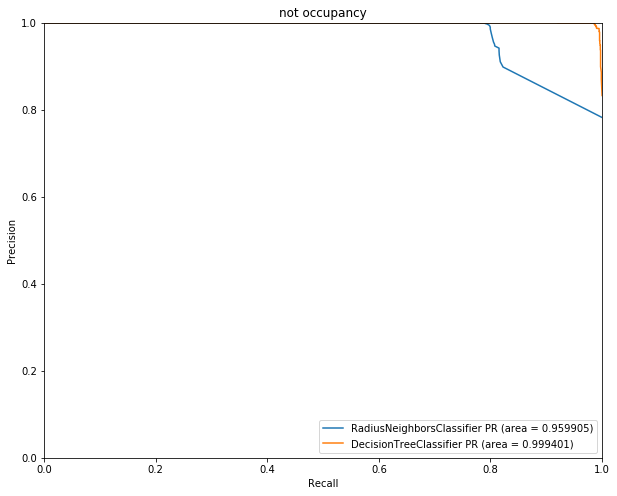

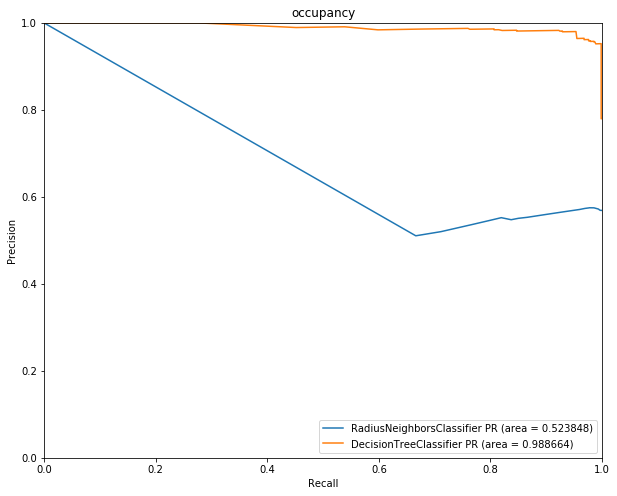

In [96]:
from sklearn.metrics import (auc, 
                             precision_recall_curve, 
                             average_precision_score)

#PR графики
# K соседей
plt.figure(figsize=(10,8))
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_rnc[:,0])
aps_rnc0 = average_precision_score(Y_test_invers,probas_rnc[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc0))
# Логический классификатор
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_dtc[:,0])
aps_dtc0 = average_precision_score(Y_test_invers,probas_dtc[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc0))
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not occupancy')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(Y_test, probas_rnc[:,1])
aps_rnc0 = average_precision_score(Y_test,probas_rnc[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_rnc0))
# Логический классификатор
precision, recall, thresholds = precision_recall_curve(Y_test, probas_dtc[:,1])
aps_dtc0 = average_precision_score(Y_test,probas_dtc[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc0)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('occupancy')
plt.show()

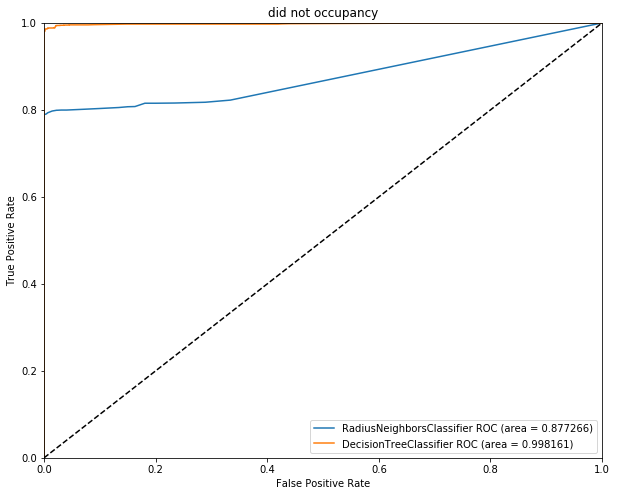

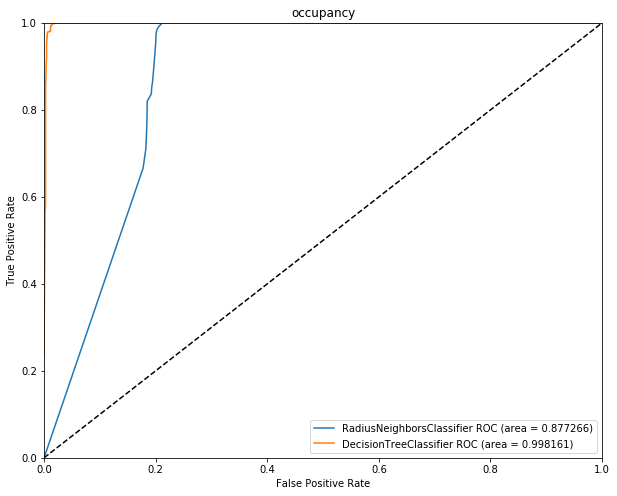

In [87]:
#ROC графики
plt.figure(figsize=(10,8))
# K соседей
tpr, fpr, thresholds = roc_curve(Y_test, probas_rnc[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Логический классификатор
tpr, fpr, thresholds = roc_curve(Y_test, probas_dtc[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('did not occupancy')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
fpr, tpr, thresholds = roc_curve(Y_test, probas_rnc[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Логический классификатор
fpr, tpr, thresholds = roc_curve(Y_test, probas_dtc[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('occupancy')
plt.show()

#### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Логический классификатор имеет лучшие показатели относительно классификатора "k ближайших соседей(по радиусу)" на ROC и PR кривых. Данные классификаторы решают задачу классфикации с вероятностью ~0.98, что является хорошим результатом, т.к. классов всего 2. Поэтому задача классификации была решена корректно